## Processamento Digital de Imagens (PDI) - Aplicações

Há diversas aplicações úteis no campo de visão computacional, dentre elas temos:
- Classificação de imagens;
- Detecção de objetos;
- Segmentação de imagens;

Qual a diferença entre elas?

No nosso dia-a-dia, conseguimos ver diferentes imagens. Ao olhar para essas imagens, o nosso cérebro, consegue decodificar o que os nosso olhos exergam, e identificamos **padrões**.

Ao diferenciar a letra `A` da letra `B`, estamos fazendo uma classificação, o mesmo ocorre ao diferenciar um cachorro de um gato!

Apesar de parecer um trabalho simples essa classificação de imagem para nós, é um grande desafio e apresenta uma grande complexidade computacional!

![https://cdn.vox-cdn.com/thumbor/BH9s7fosl_469YWr4z0vFxEwTr8=/0x0:1196x812/920x613/filters:focal(503x364:693x554):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/68928868/apple_ipod_test.0.jpg](https://cdn.vox-cdn.com/thumbor/BH9s7fosl_469YWr4z0vFxEwTr8=/0x0:1196x812/920x613/filters:focal(503x364:693x554):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/68928868/apple_ipod_test.0.jpg)

Essa classificação estranha ocorreu por pegarmos a imagem com um todo, e tentamos predizer qual seria o objeto mais provável.

Por exemplo na imagem abaixo iriamos classificar gato ou cachorro?

![https://miro.medium.com/max/506/0*nclm0Ik4OlKnjO_F.jpeg](https://miro.medium.com/max/506/0*nclm0Ik4OlKnjO_F.jpeg)

No nosso cérebro conseguimos identificar intuitivamente que o gato está na esquerda e o cachorro na direita, mas como funciona para a máquina?

Essa tarefa é conhecida como **detecção de objetos**. Conseguindo identificar a localização e a classe que um dado objeto pertence na imagem.

Quando temos apenas um objeto e queremos localizá-lo na imagem, essa tarefa é conhecida como **localização da imagem**.

![https://miro.medium.com/max/1038/0*zs2zJGdh92YUH98A.png](https://miro.medium.com/max/1038/0*zs2zJGdh92YUH98A.png)

Como o computador consegue entender os limites de cada objeto?

Esse processo de compreender e identificar os limites de cada objeto dentro de uma imagem é conhecida como **segmentação da imagem** (image segmentation). Nesse processo dividimos a imagem em pedaços menos e começamos a agrupar os pequenos pedaços que possuem atributos semelhantes. Após esse processo conseguimos identificar quais regiões possuem informaçnoes que conseguimos detectar ou classificar!

![https://miro.medium.com/max/1200/0*VX1UNfrNgjRD24Kq.jpg](https://miro.medium.com/max/1200/0*VX1UNfrNgjRD24Kq.jpg)

A segmentação A segmentação busca compreender o espaço que que um objeto de interesse se encontra, enquanto na detecção de objetos temos o objetivo de criar caixas para cada classe de imagem. Note que a detecção de objetos não diz qual o formato ou a posição exata do objeto na imagem!



### Classificação de imagens

In [452]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import tensorflow.keras as keras
from skimage import feature

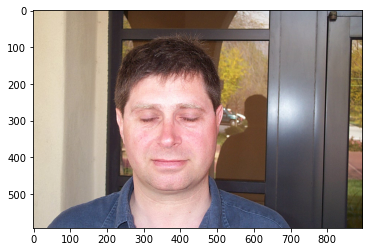

In [3]:
img = cv2.imread('dataset/faces/image_0010.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [9]:
img.shape

(592, 896, 3)

In [134]:
files = [file for file in glob.glob('dataset/faces/i_labeled/*/*.jpg')]
files

['dataset/faces/i_labeled/9/image_0168.jpg',
 'dataset/faces/i_labeled/9/image_0169.jpg',
 'dataset/faces/i_labeled/9/image_0167.jpg',
 'dataset/faces/i_labeled/9/image_0166.jpg',
 'dataset/faces/i_labeled/9/image_0170.jpg',
 'dataset/faces/i_labeled/0/image_0019.jpg',
 'dataset/faces/i_labeled/0/image_0018.jpg',
 'dataset/faces/i_labeled/0/image_0020.jpg',
 'dataset/faces/i_labeled/0/image_0008.jpg',
 'dataset/faces/i_labeled/0/image_0009.jpg',
 'dataset/faces/i_labeled/0/image_0021.jpg',
 'dataset/faces/i_labeled/0/image_0013.jpg',
 'dataset/faces/i_labeled/0/image_0007.jpg',
 'dataset/faces/i_labeled/0/image_0006.jpg',
 'dataset/faces/i_labeled/0/image_0012.jpg',
 'dataset/faces/i_labeled/0/image_0004.jpg',
 'dataset/faces/i_labeled/0/image_0010.jpg',
 'dataset/faces/i_labeled/0/image_0011.jpg',
 'dataset/faces/i_labeled/0/image_0005.jpg',
 'dataset/faces/i_labeled/0/image_0001.jpg',
 'dataset/faces/i_labeled/0/image_0015.jpg',
 'dataset/faces/i_labeled/0/image_0014.jpg',
 'dataset/

In [135]:
import glob
labels = []
for i, file in enumerate(files):
    img = cv2.imread(file) ### ler a imagem
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    label = file.split('/')[3]
    name = file.split('/')[-1]
    cv2.imwrite('dataset/faces/gray/' + label + '/' + name + '.png', img_gray)
    labels.append(label)

In [818]:
dataset = []
files = [file for file in glob.glob('dataset/faces/gray/*/*.png')]
files.sort()
for file in files:
    img = cv2.imread(file) ### ler a imagem
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dataset.append(img_gray)

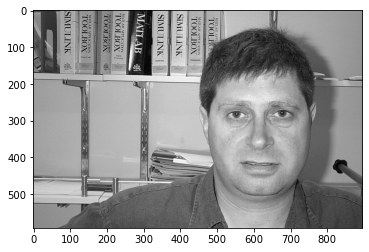

In [819]:
plt.imshow(dataset[0], cmap='gray');

In [820]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.33, stratify=labels, random_state=42)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print('tamanho do dataset de treino:', X_train.shape)
print('tamanho do dataset de teste:', X_test.shape)

tamanho do dataset de treino: (129, 592, 896)
tamanho do dataset de teste: (65, 592, 896)


4


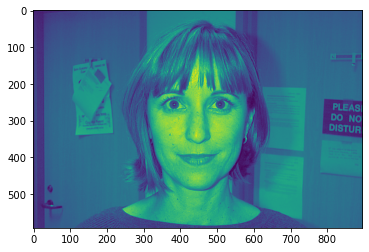

In [821]:
plt.imshow(X_train[4]);
print(y_train[4])

In [822]:
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)
print(X_train_rf.shape)

(129, 530432)


In [823]:
X_train[0].shape

(592, 896)

In [824]:
592*896*3

1591296

In [825]:
clf = RandomForestClassifier()
clf.fit(X_train_rf, y_train) 
y_pred_rf = clf.predict(X_test_rf)

In [826]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.56      0.71      0.63         7
          11       0.44      0.67      0.53         6
          12       0.67      0.29      0.40         7
           3       1.00      0.71      0.83         7
           4       0.83      0.71      0.77         7
           5       0.64      0.88      0.74         8
           6       0.86      0.86      0.86         7
           7       0.88      0.78      0.82         9

    accuracy                           0.68        65
   macro avg       0.70      0.67      0.67        65
weighted avg       0.71      0.68      0.68        65



#### Vamos utilizar técnicas de pré-processamento de imagens para melhorar o desempenho

In [859]:
dataset_train = []
dataset_test = []

for img in X_train:
    
    img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #clahe = cv2.createCLAHE(clipLimit= 2,tileGridSize=(3,3))
    #cl1 = clahe.apply(img)
    img_eq = cv2.equalizeHist(img)
    dataset_train.append(img)

In [860]:
for img in X_test:
    
    img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #clahe = cv2.createCLAHE(clipLimit= 2,tileGridSize=(3,3))
    #cl1 = clahe.apply(img)
    img_eq = cv2.equalizeHist(img)
    dataset_test.append(img)

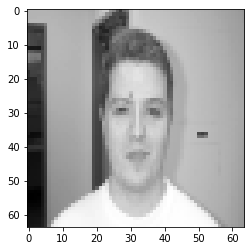

In [861]:
plt.imshow(dataset_train[100], cmap='gray');

In [862]:
X_train_ = np.asarray(dataset_train)
X_test_ = np.asarray(dataset_test)
print('tamanho do dataset de treino:', X_train_.shape)
print('tamanho do dataset de teste:', X_test_.shape)

tamanho do dataset de treino: (129, 64, 64)
tamanho do dataset de teste: (65, 64, 64)


In [863]:
X_train_rf = X_train.reshape(X_train_.shape[0], -1)
X_test_rf = X_test.reshape(X_test_.shape[0], -1)
print(X_train_rf.shape)

(129, 530432)


In [864]:
clf = RandomForestClassifier()
clf.fit(X_train_rf, y_train) 
y_pred_rf = clf.predict(X_test_rf)

In [865]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.56      0.71      0.63         7
          11       0.67      0.67      0.67         6
          12       1.00      0.14      0.25         7
           3       0.88      1.00      0.93         7
           4       0.71      0.71      0.71         7
           5       0.70      0.88      0.78         8
           6       0.83      0.71      0.77         7
           7       0.73      0.89      0.80         9

    accuracy                           0.71        65
   macro avg       0.74      0.70      0.68        65
weighted avg       0.74      0.71      0.68        65



In [858]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.55      0.86      0.67         7
          11       0.57      0.67      0.62         6
          12       0.50      0.29      0.36         7
           3       0.83      0.71      0.77         7
           4       1.00      0.71      0.83         7
           5       0.67      0.75      0.71         8
           6       0.86      0.86      0.86         7
           7       0.89      0.89      0.89         9

    accuracy                           0.71        65
   macro avg       0.71      0.70      0.70        65
weighted avg       0.72      0.71      0.70        65



#### Deep Learning - Redes Neurais Convolucionais

* Algoritmo que aplica diferentes filtros para extração de features da imagem
* A tarefa do algoritmo é aprender quais os filtros mais adequados para aquele dataset

![Title](imgs/cnn.png)


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [533]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [541]:
train_images.shape

(50000, 32, 32, 3)

In [528]:
X_train_cnn, X_test_cnn = X_train_cnn/ 255.0, X_test_cnn/255.0

In [534]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [535]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [536]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5137 - accuracy: 0.4479 - val_loss: 1.2870 - val_accuracy: 0.5365
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1500 - accuracy: 0.5921 - val_loss: 1.0563 - val_accuracy: 0.6251
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0028 - accuracy: 0.6490 - val_loss: 0.9900 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9063 - accuracy: 0.6829 - val_loss: 0.9783 - val_accuracy: 0.6541
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8323 - accuracy: 0.7096 - val_loss: 0.9508 - val_accuracy: 0.6705
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7736 - accuracy: 0.7293 - val_loss: 0.8947 - val_accuracy: 0.6939
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7251 - accuracy: 0.7462 - val_loss: 0.9556 - va

In [538]:
y_pred_cnn = np.argmax(model.predict(test_images), axis = -1)

In [539]:
print(classification_report(test_labels, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.83      0.82      0.83      1000
           2       0.59      0.58      0.59      1000
           3       0.51      0.53      0.52      1000
           4       0.65      0.68      0.66      1000
           5       0.65      0.52      0.58      1000
           6       0.72      0.82      0.76      1000
           7       0.76      0.75      0.76      1000
           8       0.82      0.81      0.81      1000
           9       0.86      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

